---
<a name = Section1></a>
# **1. Introduction**
---

**PROJECT DESCRIPTION:**
============================

See https://www.insaid.co/my-account/projects/ML1/predicting-bejings-air-pollution/


---
<a name = Section2></a>
# **2. Installing and importing libraries**
---



<a name = Section21></a>
### **2.1 Installing Libraries**

1.   Restart Runtime (in Colab it is menu -> Runtime -> Restart Runtime)
2.   Run the below steps


In [ ]:
#!pip install -q datascience                   # Package that is required by pandas profiling
#!pip install -q pandas-profiling              # Library to generate basic statistics about data

In [ ]:
#!pip install -q --upgrade pandas-profiling

3.   Restart Runtime again 
4.   Run step 2 again
5.   Run the code below (to install the other libraries)

In [5]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.ensemble import RandomForestClassifier                 # To implement random forest classifier
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section3></a>
# **3. Loading Train and Test data**
---



<a name = Section31></a>
### **3.1 Loading Training data**

In [6]:
#------ TRAINING DATA Loading ------
air_pollution_train = pd.read_csv('https://raw.githubusercontent.com/ruchit-sengupta/mlf-insaid-projects/main/air-pollution-prediction-beijing/beijing_train.csv')
print('************ TRAINING DATA ************\n\n')
print('Shape:', air_pollution_train.shape)
display(air_pollution_train.head())


************ TRAINING DATA ************


Shape: (403776, 18)


,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


<a name = Section32></a>
### **3.2 Loading Test data**

In [7]:
#------ TEST DATA Loading ------
air_pollution_test = pd.read_csv('https://raw.githubusercontent.com/ruchit-sengupta/mlf-insaid-projects/main/air-pollution-prediction-beijing/beijing_test.csv')
print('************ TEST DATA ************\n\n')
print('Shape:', air_pollution_test.shape)
display(air_pollution_test.head())


************ TEST DATA ************


Shape: (16728, 17)


,REF_NO,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,33649,2017,1,1,0,496.0,8.0,121.0,6100.0,4.0,-4.7,1022.1,-6.1,0.0,ENE,1.0,Aotizhongxin
1,33650,2017,1,1,1,497.0,7.0,113.0,6300.0,4.0,-5.2,1022.3,-6.4,0.0,E,0.7,Aotizhongxin
2,33651,2017,1,1,2,469.0,7.0,111.0,6200.0,4.0,-5.4,1022.5,-6.5,0.0,ENE,1.1,Aotizhongxin
3,33652,2017,1,1,3,425.0,6.0,109.0,5900.0,3.0,-5.2,1022.5,-6.2,0.0,E,1.1,Aotizhongxin
4,33653,2017,1,1,4,468.0,10.0,123.0,7700.0,16.0,-5.0,1021.9,-5.8,0.0,ENE,1.0,Aotizhongxin


---
<a name = Section4></a>
# **4. Pre-Profiling Report**
---

In [ ]:
#!pip install pandas-profiling==2.7.1
#profile = ProfileReport(df = air_pollution_train)
#profile.to_file(output_file = 'Pre Profiling Report.html')
#print('Accomplished!')

In [ ]:
#from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
#files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

---
<a name = Section5></a>
# **5. Exploratory Data Analysis**
---

<a name = Section51></a>
### **5.1 Relationship with PM2.5**

**Initial Observations:**

*   PM2.5 (o/p) has high correlations with PM10, SO2, NO2, and CO
*   We can ignore the other variables

Let's first do some joint plots vs PM2.5, and then do some pairwise plots and heatmap to get a better understanding of the correlations

<a name = Section52></a>
### **5.2 Joint Plots vs PM2.5**

In [ ]:
data = air_pollution_train[['PM10', 'SO2', 'NO2', 'CO', 'PM2.5']]
data.head()

,PM10,SO2,NO2,CO,PM2.5
0,4.00000,4.00000,7.00000,300.00000,4.00000
1,8.00000,4.00000,7.00000,300.00000,8.00000
2,7.00000,5.00000,10.00000,300.00000,7.00000
3,6.00000,11.00000,11.00000,300.00000,6.00000
4,3.00000,12.00000,12.00000,300.00000,3.00000


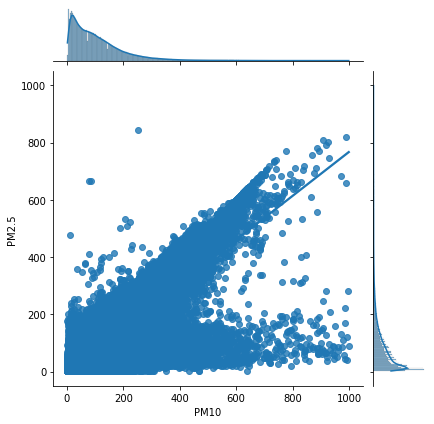

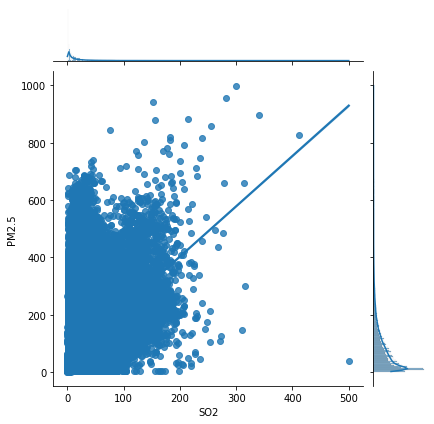

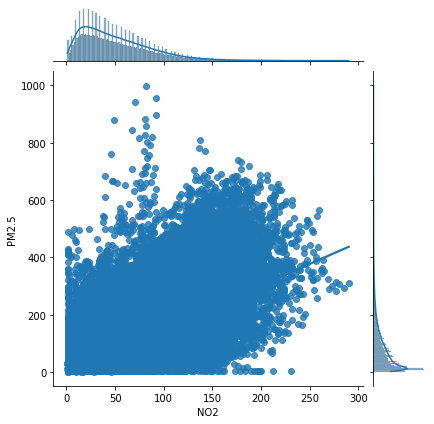

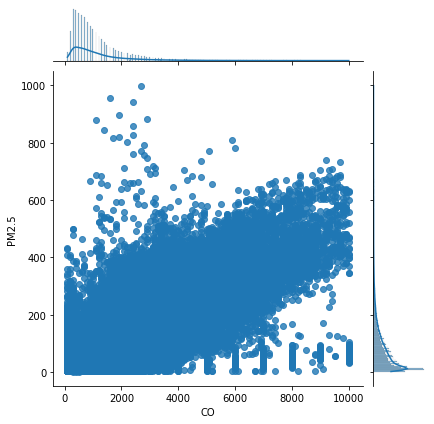

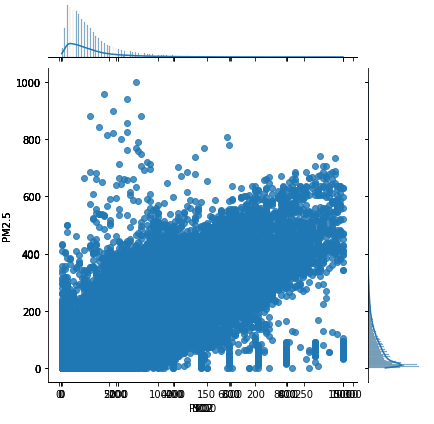

In [ ]:
JG1 = sns.jointplot("PM10", "PM2.5", data=data, kind='reg')
JG2 = sns.jointplot("SO2", "PM2.5", data=data, kind='reg')
JG3 = sns.jointplot("NO2", "PM2.5", data=data, kind='reg')
JG4 = sns.jointplot("CO", "PM2.5", data=data, kind='reg')


#subplots migration
f = plt.figure()
for J in [JG1, JG2,JG3, JG4]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

<a name = Section53></a>
### **5.3 Pairwise Plots**

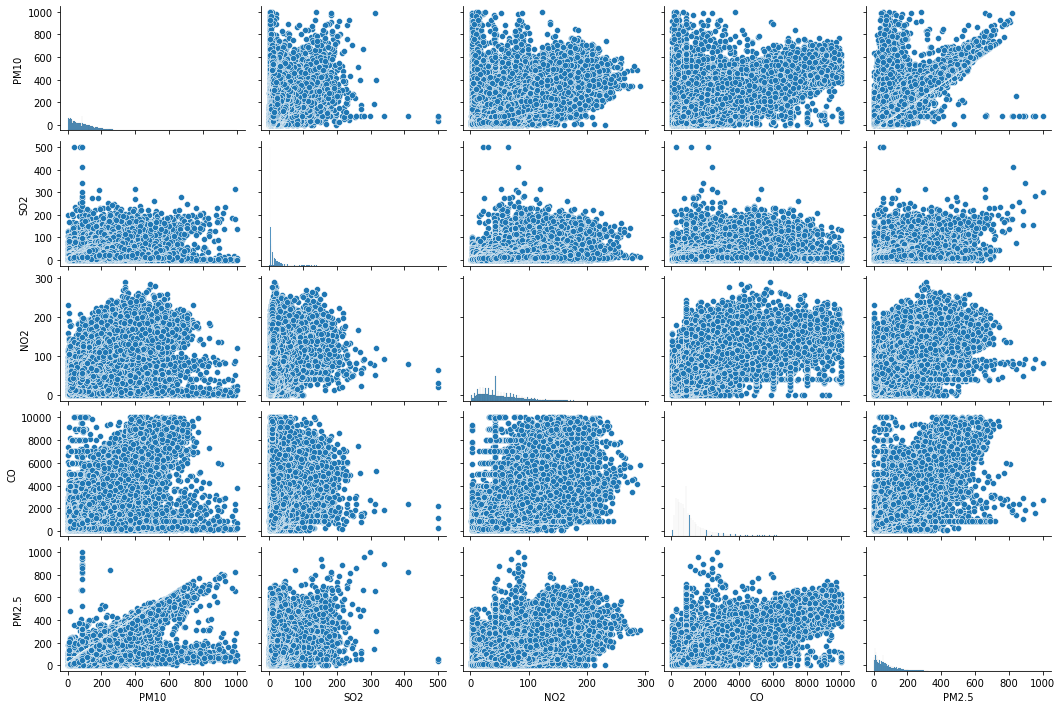

In [ ]:
sns.pairplot(data, size = 2, aspect = 1.5)

<a name = Section53></a>
### **5.4 Heatmaps**

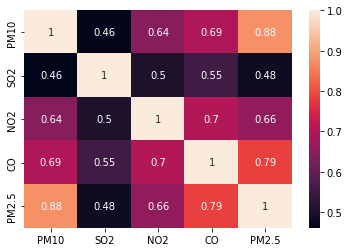

In [ ]:
sns.heatmap(data.corr(), annot=True );


Text(0.5, 1.0, 'Correlation between features')

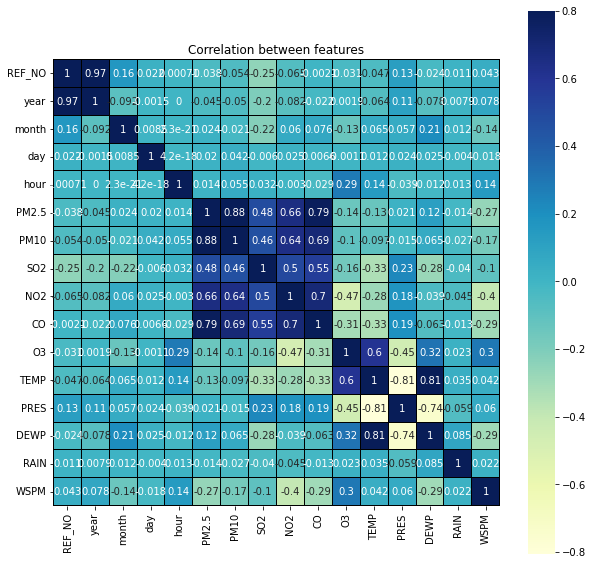

In [ ]:
#### Detailed HEAT MAP of Correlations ####

corr = air_pollution_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

---
<a name = Section6></a>
# **6. Feature Selection**
---

OBSERVATIONS (from sections 4 and 5):

*   The following have the highest correlation (+ / -) with the o/p variable PM2.5:
*   PM10, CO
*   This means that these have max contribution to the value of the o/p
*   We can ignore the rest, irrespective of whether they have autocorrelation / multicollinearity etc etc

POSSIBLE MULTICOLLINEARITY ('<->' Means correlation. My notation/shorthand):
[Obtained from pre-profiling report of section 4]

*   PM10 <-> NO2, CO
*   NO2 <-> PM10, SO2, CO, O3
*   CO <-> PM10, SO2, NO2

All we care:

*   PM10 <-> CO
Correlation value, not too high, though (0.68)

In short:

*   PM10, CO have better than average intercorrelation
*   Which means there is a potential for multicollinearity
*   We can solve it by Scaling (in this case)
*   Other ways to minimise it is by combining features, dropping features




**To combine or to drop we gotta calculate VIFs.**

**But even before that, we have to fill missing / null values**


---
<a name = Section7></a>
# **7. Filling Missing / Null values if any**
---


<a name = Section71></a>
### **7.1 Data Description (Mean, median, std. dev. etc)**

In [8]:

# Describe only the columns whose statistics, we Require
air_pollution_train.loc[:, air_pollution_train.columns.isin(['REF_NO', 'year', 'month', 'day', 'hour', 'PM10', 'CO', 'PM2.5'])].describe()


,REF_NO,year,month,day,hour,PM2.5,PM10,CO
count,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,395301.000000,397554.000000,383515.000000
mean,16824.500000,2014.564194,6.735378,15.748217,11.500000,79.248275,104.327897,1214.843339
std,9713.352953,1.097503,3.356479,8.808891,6.922195,79.146708,90.136400,1124.285676
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,100.000000
25%,8412.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,500.000000
50%,16824.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,83.000000,900.000000
75%,25236.250000,2016.000000,10.000000,23.000000,17.250000,110.000000,145.000000,1500.000000
max,33648.000000,2016.000000,12.000000,31.000000,23.000000,999.000000,999.000000,10000.000000


Observations from this and the Pre-Profiling Report:
=====================================================

*   (o/p) PM2.5 -- Skewed. Outliers exist.Fill missing / null values with MEDIAN
*   PM10 -- Skewed. Outliers exist. Fill with MEDIAN
*   CO -- Very Skewed. Significant amount of outliers. Fill with MEDIAN






<a name = Section72></a>
### **7.2 Fill missing / null values with Median**

In [9]:
median_pm25 = air_pollution_train['PM2.5'].median()#calculating the median of the PM2.5
air_pollution_train['PM2.5'].fillna(median_pm25, inplace = True) #Fill na with median values

median_pm10 = air_pollution_train['PM10'].median()#calculating the median of the PM10
air_pollution_train['PM10'].fillna(median_pm10, inplace = True) #Fill na with median values

median_co = air_pollution_train['CO'].median()#calculating the median of the CO
air_pollution_train['CO'].fillna(median_co, inplace = True) #Fill na with median values

air_pollution_train.loc[:, air_pollution_train.columns.isin(['REF_NO', 'year', 'month', 'day', 'hour', 'PM10', 'CO', 'PM2.5'])].describe()


,REF_NO,year,month,day,hour,PM2.5,PM10,CO
count,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000
mean,16824.500000,2014.564194,6.735378,15.748217,11.500000,78.739319,103.999244,1199.044874
std,9713.352953,1.097503,3.356479,8.808891,6.922195,78.388786,89.477795,1097.868685
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,100.000000
25%,8412.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,37.000000,500.000000
50%,16824.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,83.000000,900.000000
75%,25236.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,1500.000000
max,33648.000000,2016.000000,12.000000,31.000000,23.000000,999.000000,999.000000,10000.000000


---
<a name = Section8></a>
# **8. Feature Engineering**
---

Thus, we select the features
**PM10, CO**

---
<a name = Section9></a>
# **9. Data Preparation (before model creation)**
---

<a name = Section91></a>
### **9.1 Scaling**

In [10]:
# SCALING
feature_cols = ['PM10', 'CO', 'PM2.5']
data = air_pollution_train[feature_cols]
display(data.head());

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data1 = scaler.transform(data)

air_pollution_train = pd.DataFrame(data1)
air_pollution_train.columns = feature_cols
display(air_pollution_train.head());

,PM10,CO,PM2.5
0,4.0,300.0,4.0
1,8.0,300.0,8.0
2,7.0,300.0,7.0
3,6.0,300.0,6.0
4,3.0,300.0,3.0


,PM10,CO,PM2.5
0,-1.117589,-0.818901,-0.953445
1,-1.072885,-0.818901,-0.902417
2,-1.084061,-0.818901,-0.915174
3,-1.095237,-0.818901,-0.927931
4,-1.128765,-0.818901,-0.966202


<a name = Section92></a>
### **9.2 X and y creation**

In [11]:

# ---- Copy only the data of the selected features -----
X = air_pollution_train[['PM10', 'CO']]
y = air_pollution_train['PM2.5']

display(X.shape)
display(y.shape)


(403776, 2)

(403776,)

<a name = Section93></a>
### **9.3 Train-Test Split**

In [12]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# 80-20 train-test split
# default test_size=0.25
# random_state=seedvalue --> Setting this to a const int => You'll get the same shuffle everytime you run it


<a name = Section94></a>
### **9.4 Scaling (Fit-Transform for Train, Transform for Test)**

In [ ]:
#### SCALING ####

#### FIT_TRANSFORM (X_train) & TRANSFORM (X_test) ####
#### FIT => "Study"/ Learn | TRANSFORM => "Scale/Normalization" ###

# Read about MinMaxScaler, RobustScaler
# import Standard Scaler package. It will scale the data around 0
from sklearn.preprocessing import StandardScaler

# Create object of StandardScaler()
scaler = StandardScaler()

## FIT / TRAIN, and TRANSFORM / SCALE ###

# Now go and study i.e. fit() and give exam i.e. transform() on X_train
X_train[ ['PM10', 'CO'] ] = scaler.fit_transform(X_train)

# Transform on X_test
X_test[ ['PM10', 'CO'] ] = scaler.transform(X_test)

display("X_train Shape:", X_train.shape)
display("X_test Shape:", X_test.shape)
display("y_train Shape:", y_train.shape)
display("y_test Shape:", y_test.shape)

display("X_train:", X_train.head())
display("X_test", X_test.head())
display("y_train", y_train.head())
display("y_test", y_test.head())

---
<a name = Section10></a>
# **10. Model creation and prediction**
---

<a name = Section91></a>
### **10.1 RF regression model (with RandomizedSearchCV algo)**

In [14]:
### Random Forest Regression ###

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Train the model on training data
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train);


In [15]:
# Parameters for RandomizedSearchCV

# Specify parameters and distributions to sample from
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 
max_depth.append(None)
bootstrap = [True, False]

param_dist = {"max_depth": max_depth,
              "bootstrap": bootstrap,
              "n_estimators": n_estimators,
              'max_features': max_features
             }

# Run randomized search
random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   scoring='neg_mean_absolute_error', 
                                   cv = 3, 
                                   verbose=2, 
                                   random_state=42, 
                                   n_jobs=-1, 
                                   return_train_score=True)

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, None],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 15]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

<a name = Section102></a>
### **10.2 Prediction**

Text(0, 0.5, 'Predicted Values')

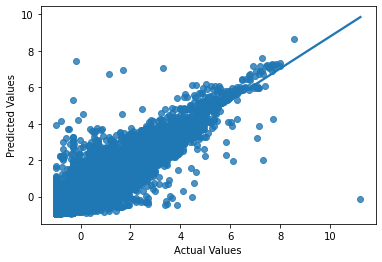

In [16]:
### PREDICTION ###

# Get predicted values or that #
y_pred_train = random_search.predict(X_train)
y_pred_test = random_search.predict(X_test)

sns.regplot(y_test,y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

---
<a name = Section11></a>
# **11. Model Evaluation**
---

In [17]:
from sklearn import metrics
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE = ', RMSE_test)


RMSE =  0.34904094120047235


In [18]:
 ### Evaluation Metrics: R-Sq and Adusted R-Sq Scores ###

# Calculate R-Sq score #
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print(r2_train)
print(r2_test)

# Calculate Adjusted R-Sq #
n_train = X_train.shape[0] # No of rows = no of samples
n_test = X_test.shape[0] # No of rows = no of samples
k_train = X_train.shape[1] # No of cols = no of I.V.s
k_test = X_test.shape[1] # No of cols = no of I.V.s

r2_adj_train = 1 - ( ((1 - r2_train) * (n_train - 1)) / (n_train - k_train - 1) )
r2_adj_test = 1 - ( ((1 - r2_test) * (n_test - 1)) / (n_test - k_test - 1) )

### Print data ###
print("R-Sq for training set = " + str(r2_train) + " vs " + "Adjusted R-Sq for training set = " + str(r2_adj_train))
print("R-Sq for test set = " + str(r2_test) + " vs " + "Adjusted R-Sq for test set = " + str(r2_adj_test))

### The End ###

0.8851300144830847
0.8764995023067381
R-Sq for training set = 0.8851300144830847 vs Adjusted R-Sq for training set = 0.8851293032512578
R-Sq for test set = 0.8764995023067381 vs Adjusted R-Sq for test set = 0.8764964435845187
